<a href="https://colab.research.google.com/github/saided/pandas_using_python/blob/master/pandas_ted_talk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
df = pd.read_csv('ted.csv')
print(df.head())
print(df.columns)
df[['speaker_occupation']].tail(15)
print(df['main_speaker'][df.speaker_occupation=='Author'])
#print(df[df.views.max()])

   comments  ...     views
0      4553  ...  47227110
1       265  ...   3200520
2       124  ...   1636292
3       200  ...   1697550
4       593  ...  12005869

[5 rows x 17 columns]
Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')
50             Robert Neuwirth
261                  AJ Jacobs
355           Benjamin Wallace
594           Edwidge Danticat
607                 JK Rowling
656           Elizabeth Pisani
1040    Guy-Philippe Goldstein
1100                 AJ Jacobs
1297           Tracy Chevalier
1320           Robert Neuwirth
1766                 AJ Jacobs
1772             Shaka Senghor
2054              Taiye Selasi
2102            Paul Greenberg
2211          Lidia Yuknavitch
2288                J.D. Vance
2347           Laura Vanderkam
2399             Caroli

In [16]:
df.shape

(2550, 17)

In [20]:
df.dtypes
# object means it can be a string object or any of the python objects like lists dictionaries etc

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [21]:
df.isna() # it gives out true if there is any missing values in the data

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2547,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2548,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isna().sum() # it is used to count all the missing values across all the coumns along axis=0
# Here we can see that there are 6 missing values in the speaker_occupation column

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [31]:
# creating a new column
df['comments_per_views']= df.comments/df.views
print(df.head())
print(df.columns)
# As we can see a new column has been added at the last

   comments  ... comments_per_views
0      4553  ...           0.000096
1       265  ...           0.000083
2       124  ...           0.000076
3       200  ...           0.000118
4       593  ...           0.000049

[5 rows x 18 columns]
Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'comments_per_views'],
      dtype='object')


In [33]:
# Sorting the values
df.sort_values('comments_per_views').tail() # by default it sorts in ascending order

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_views
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


#Which talks provoke the most online discussion

In [36]:
# to find this we will calculate the views per comment
df['views_per_comment'] = df.views / df.comments
df.sort_values('views_per_comment').head()
# AS we can see for the first row for every 450 views there is a comment which is highest of all

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_views,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682


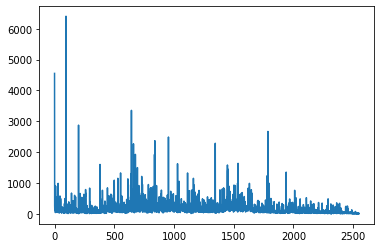

In [37]:
df.comments.plot()

In [43]:
#Filtering the above plot
df[df.comments<1000].shape

(2518, 19)

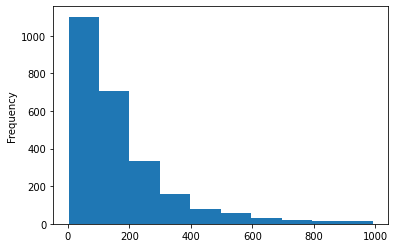

In [47]:
df[df.comments<1000].comments.plot(kind='hist')

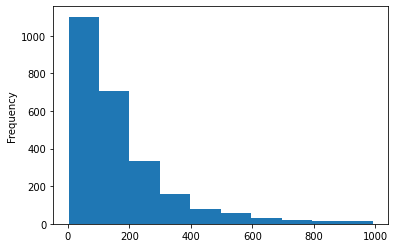

In [52]:
# Another way to plot
df.loc[df.comments<1000,'comments'].plot(kind='hist') # here comments inside the loc indictes that to use the comments column
# we can pass a list of columns also

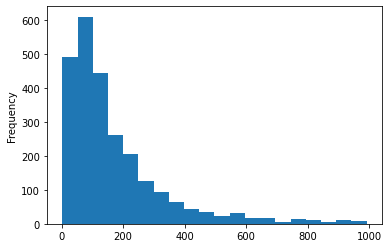

In [55]:
df.loc[df.comments<1000,'comments'].plot(kind='hist',bins=20)

#Plot the number of talks that took place each year

In [61]:
df.event.sample(10)

2395     TEDWomen 2016
1048    TEDGlobal 2011
1980           TED2015
1371     TEDxCambridge
1594           TED2013
1744           TED2014
1149       TEDxPhoenix
1332    TEDGlobal 2012
1842    TEDGlobal 2014
309            TED2003
Name: event, dtype: object

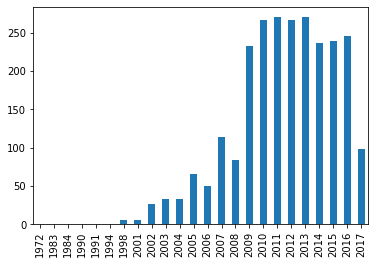

In [77]:
df.film_date
# we have to convert this unix timestamp to normal timestamp
df['film_datetime']=pd.to_datetime(df.film_date,unit='s')
df.film_datetime.dt.year
df.film_datetime.dt.year.value_counts().sort_index() #it counts the total no of events yearwise and sorts them
df.film_datetime.dt.year.value_counts().sort_index().plot(kind='bar')


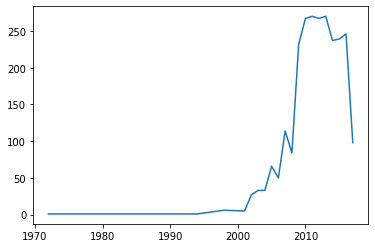

In [78]:
df.film_datetime.dt.year.value_counts().sort_index().plot()


#What were the "best" events in TED history to attend?

In [108]:
df.sample(10)
print(df.event.value_counts())
df.loc[df.event == 'TED2014',['event','views','duration']]

TED2014           84
TED2009           83
TED2016           77
TED2013           77
TED2015           75
                  ..
TEDxO'Porto        1
TEDxProvidence     1
TEDxVictoria       1
TEDxToulouse       1
TEDxEQChCh         1
Name: event, Length: 355, dtype: int64


,event,views,duration
1701,TED2014,4040280,2102
1702,TED2014,4790701,1102
1703,TED2014,760225,971
1704,TED2014,1191342,2010
1705,TED2014,2293465,1410
...,...,...,...
1892,TED2014,1301734,277
1921,TED2014,1566854,1044
1925,TED2014,1981129,791
1932,TED2014,2780484,1085


In [123]:
df.groupby('event').views.mean().sort_values().tail()

event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

In [133]:
df[df.event =='TEDxPuget Sound']

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_views,views_per_comment,film_datetime
